In [1]:
# Image Classification Tutorial
# https://www.tensorflow.org/tutorials/images/classification#visualize_the_data
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
import pathlib
data_dir = pathlib.Path("./input/garbage-classification/garbage_classification/")

input\garbage-classification\garbage_classification


In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

15515


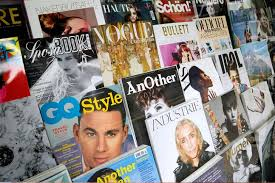

In [7]:
paper = list(data_dir.glob('paper/*'))
PIL.Image.open(str(paper[0]))

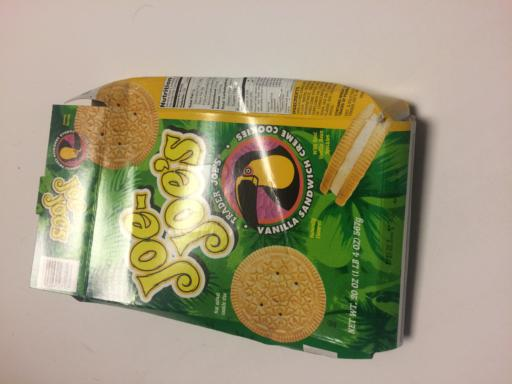

In [8]:
PIL.Image.open(str(paper[1]))

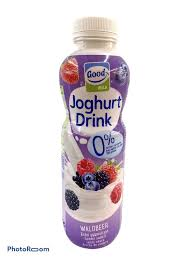

In [9]:
plastic = list(data_dir.glob('plastic/*'))
PIL.Image.open(str(plastic[0]))

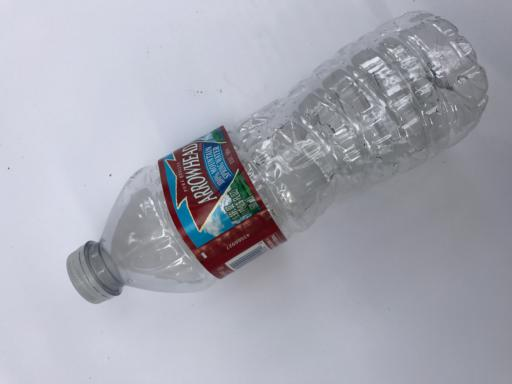

In [10]:
PIL.Image.open(str(plastic[1]))

In [11]:
batch_size = 32
img_height = 224
img_width = 224

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15515 files belonging to 12 classes.
Using 12412 files for training.


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15515 files belonging to 12 classes.
Using 3103 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']


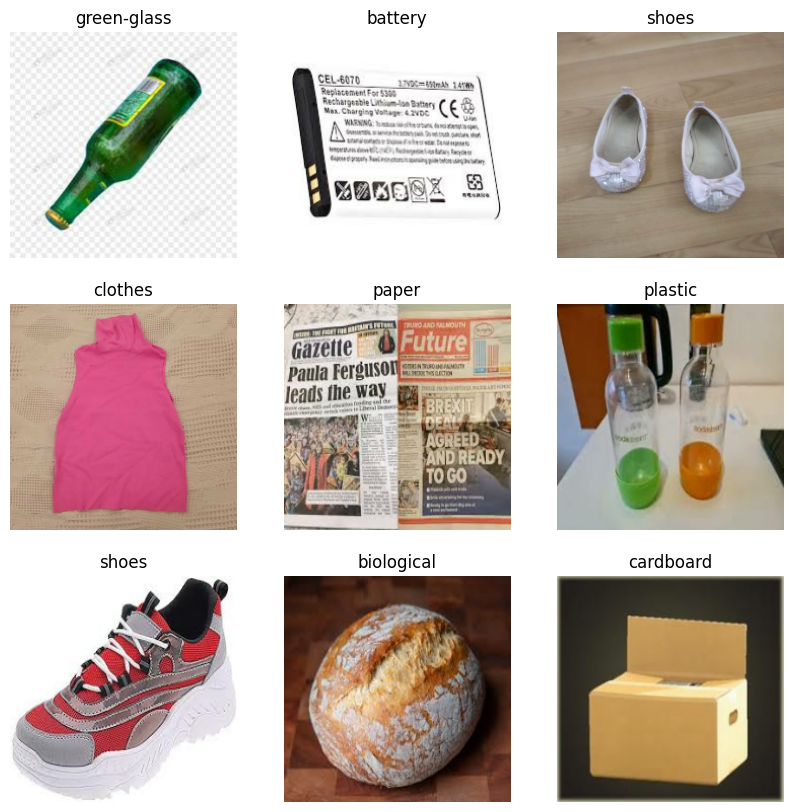

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
normalization_layer = layers.Rescaling(1./255)

In [19]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0014034553 1.0


In [21]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)       

In [24]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
388/388 [==============================] - 331s 848ms/step - loss: 1.4890 - accuracy: 0.5161 - val_loss: 1.1055 - val_accuracy: 0.6326
Epoch 2/10
388/388 [==============================] - 333s 858ms/step - loss: 0.9380 - accuracy: 0.6894 - val_loss: 0.9320 - val_accuracy: 0.6971
Epoch 3/10
388/388 [==============================] - 321s 827ms/step - loss: 0.6974 - accuracy: 0.7676 - val_loss: 0.9286 - val_accuracy: 0.6884
Epoch 4/10
388/388 [==============================] - 317s 818ms/step - loss: 0.4894 - accuracy: 0.8357 - val_loss: 0.9642 - val_accuracy: 0.7071
Epoch 5/10
388/388 [==============================] - 1182s 3s/step - loss: 0.3088 - accuracy: 0.8955 - val_loss: 1.2022 - val_accuracy: 0.6961
Epoch 6/10
388/388 [==============================] - 315s 813ms/step - loss: 0.2149 - accuracy: 0.9274 - val_loss: 1.3288 - val_accuracy: 0.6961
Epoch 7/10
388/388 [==============================] - 1487s 4s/step - loss: 0.1498 - accuracy: 0.9501 - val_loss: 1.4457 - val

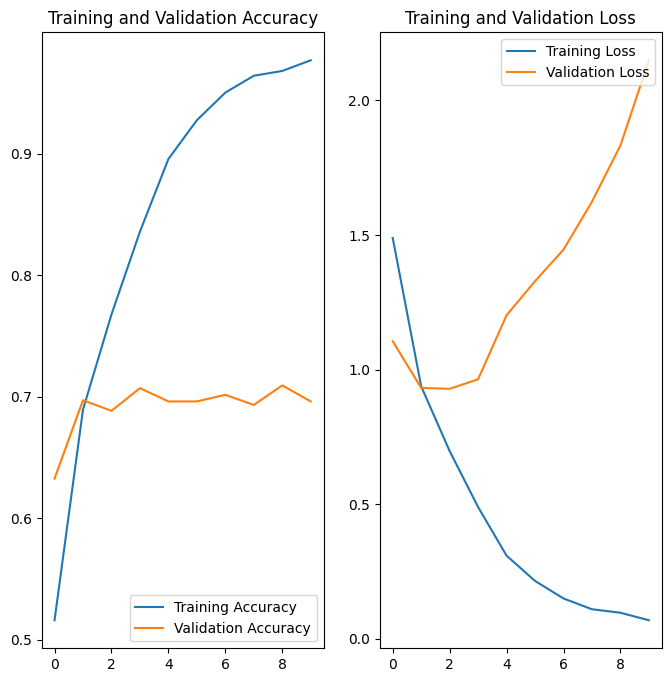

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

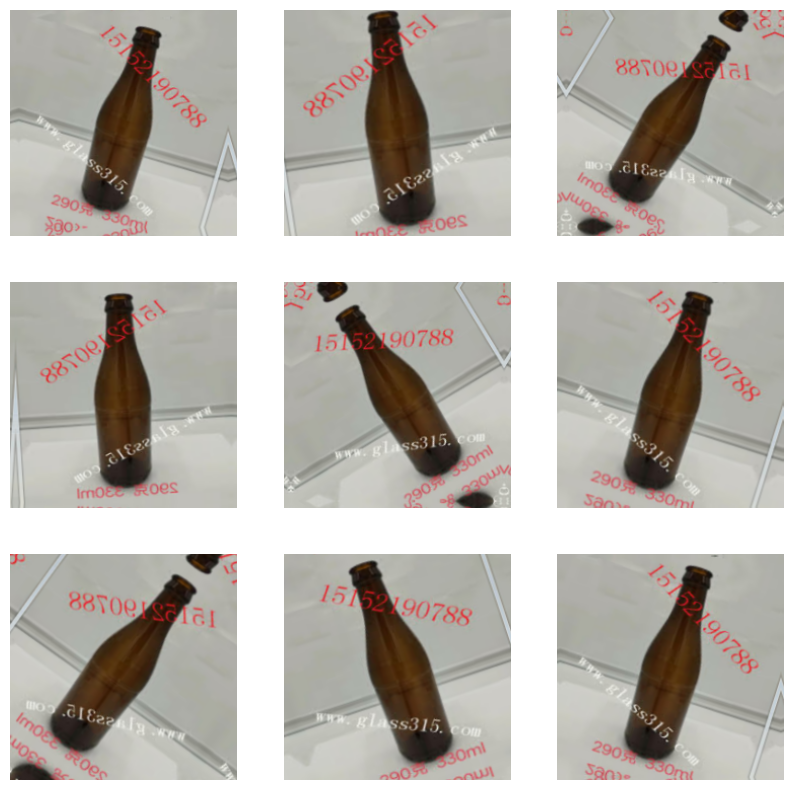

In [27]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [28]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [31]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
388/388 [==============================] - 383s 984ms/step - loss: 1.4745 - accuracy: 0.5162 - val_loss: 1.1451 - val_accuracy: 0.6142
Epoch 2/15
388/388 [==============================] - 377s 972ms/step - loss: 1.0783 - accuracy: 0.6407 - val_loss: 1.0727 - val_accuracy: 0.6381
Epoch 3/15
388/388 [==============================] - 384s 990ms/step - loss: 0.9484 - accuracy: 0.6857 - val_loss: 0.9398 - val_accuracy: 0.6903
Epoch 4/15
388/388 [==============================] - 385s 991ms/step - loss: 0.8636 - accuracy: 0.7098 - val_loss: 0.9034 - val_accuracy: 0.7071
Epoch 5/15
388/388 [==============================] - 379s 977ms/step - loss: 0.8047 - accuracy: 0.7321 - val_loss: 0.8753 - val_accuracy: 0.7129
Epoch 6/15
388/388 [==============================] - 459s 1s/step - loss: 0.7530 - accuracy: 0.7471 - val_loss: 0.8855 - val_accuracy: 0.7219
Epoch 7/15
388/388 [==============================] - 501s 1s/step - loss: 0.7048 - accuracy: 0.7661 - val_loss: 0.9155 - val_a

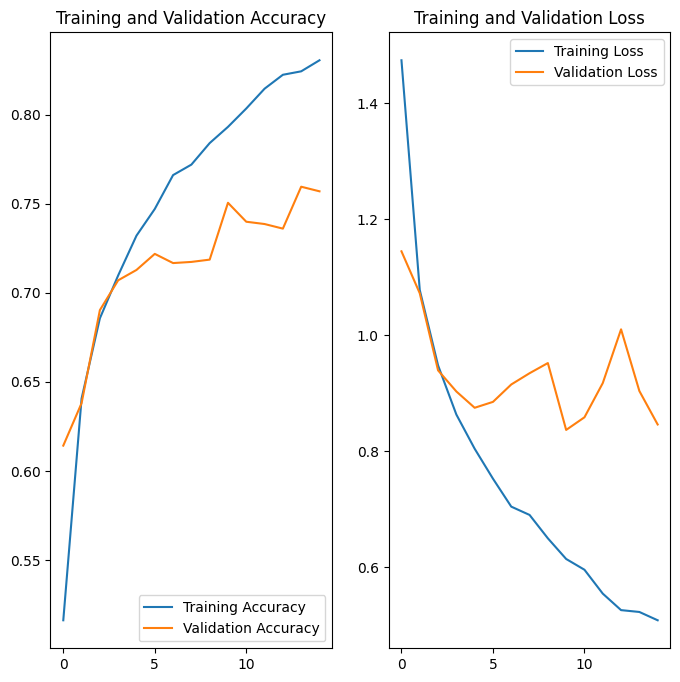

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
model.save('saved_model/demo_garbage_model')

INFO:tensorflow:Assets written to: saved_model/demo_garbage_model\assets


INFO:tensorflow:Assets written to: saved_model/demo_garbage_model\assets
